## Importing Libraries

In [ ]:
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np

## Loading Information

In [2]:
df = pd.read_csv("../data/processed/df_cleaned.csv")
df.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,level_type
0,user_3311,47,40,0,Missing,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,1,A
1,user_1972,107,99,0,India,11,1504291325,304.186,203.842,beginner,1439050893,prob_75,2,A
2,user_3317,735,715,0,Vietnam,9,1484278246,419.438,353.211,intermediate,1421847147,prob_75,2,A
3,user_2412,169,159,0,Missing,2,1505569083,345.757,345.757,intermediate,1429008478,prob_75,1,A
4,user_872,113,95,0,Bangladesh,7,1504977695,314.220,89.163,beginner,1480081730,prob_75,1,A


In [10]:
df.shape

(155295, 14)

In [11]:
df.describe()

,submission_count,problem_solved,contribution,follower_count,last_online_time_seconds,max_rating,rating,registration_time_seconds,attempts_range
count,155295.000000,155295.000000,155295.000000,155295.000000,1.552950e+05,155295.000000,155295.000000,1.552950e+05,155295.000000
mean,372.235680,336.078695,5.493718,61.064406,1.503666e+09,407.525560,368.623667,1.427513e+09,1.755028
std,398.204943,377.378519,19.076626,258.997551,3.867762e+06,99.670629,112.046565,5.033908e+07,1.078450
min,1.000000,1.000000,-64.000000,0.000000,1.484239e+09,303.899000,0.000000,1.264761e+09,1.000000
25%,118.000000,99.000000,0.000000,7.000000,1.504118e+09,323.394000,288.131000,1.408458e+09,1.000000
50%,237.000000,209.000000,0.000000,20.000000,1.505289e+09,383.028000,356.078000,1.442762e+09,1.000000
75%,480.000000,428.000000,1.000000,52.000000,1.505560e+09,468.463000,445.814000,1.464692e+09,2.000000
max,4570.000000,4476.000000,171.000000,10575.000000,1.505595e+09,983.085000,911.124000,1.484236e+09,6.000000


There are negatives values in the column 'contribution'.

In [5]:
df = df[df["contribution"]>=0]

In [6]:
df.shape

(144157, 14)

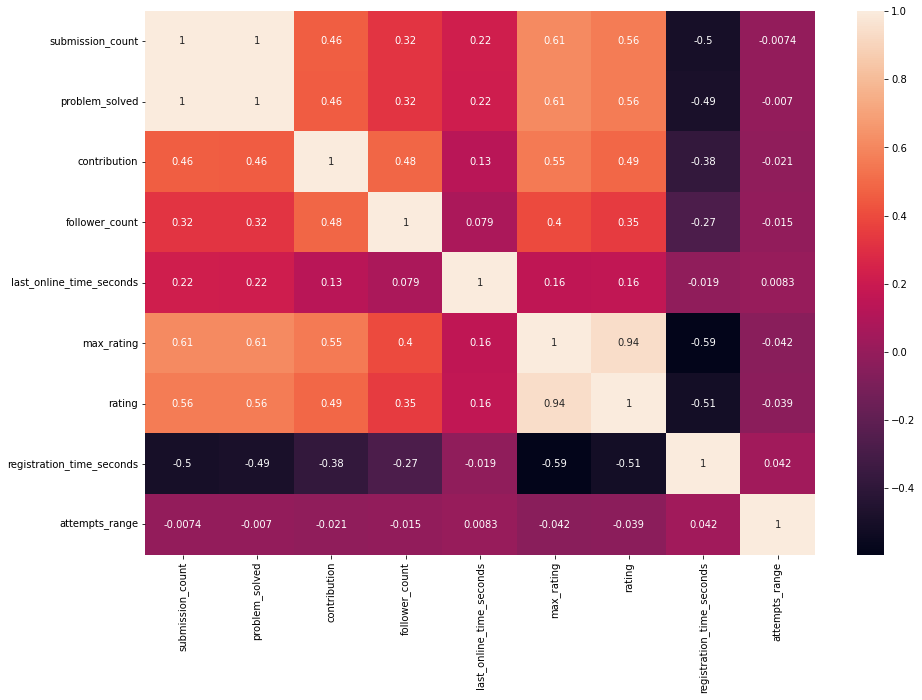

In [8]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

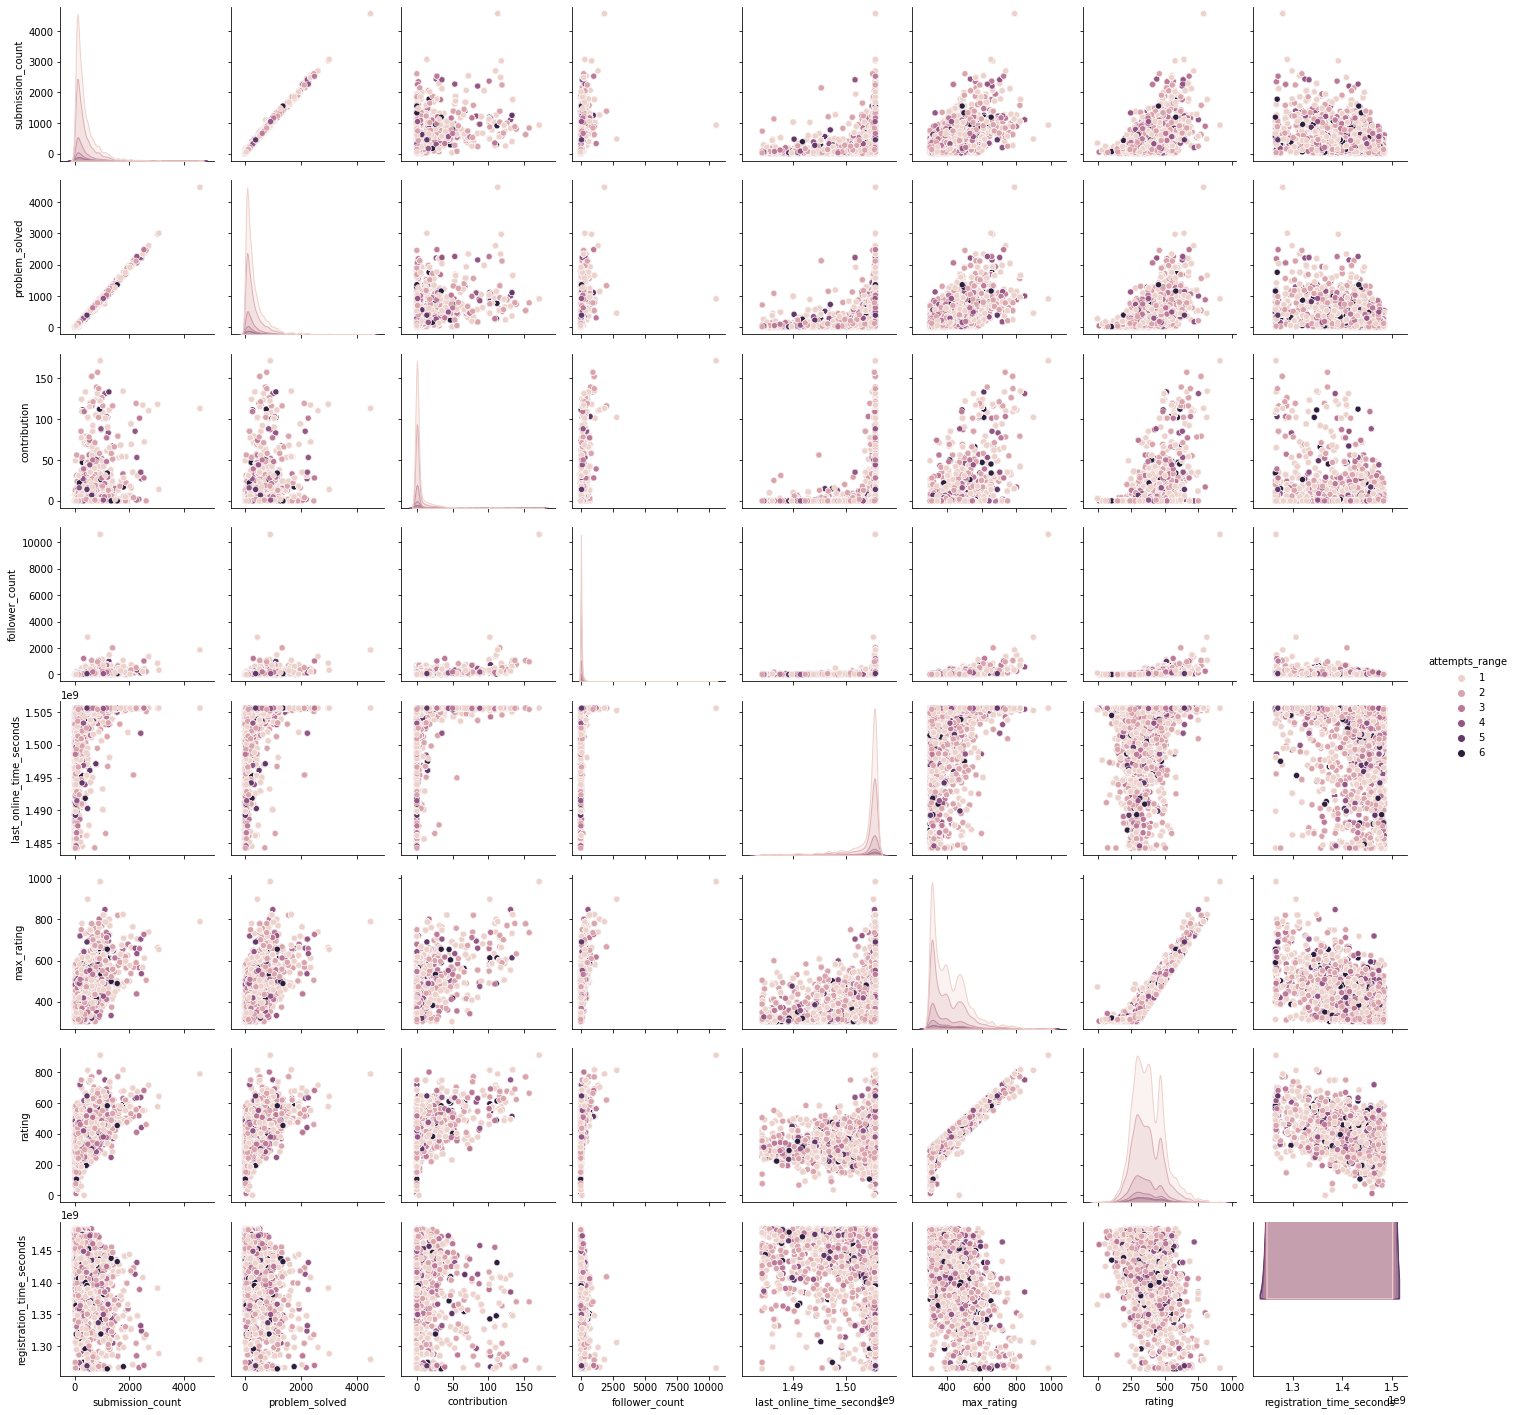

In [12]:
sns.pairplot(df, hue="attempts_range")

There is a hight correlation between problem_solved and submission_count, the same thing with max_rating and rating, so let's remove the columns problem_solved and rating.

In [14]:
df.drop(['max_rating', 'submission_count'], axis=1, inplace=True)

In [16]:
y.value_counts(normalize=True)

1    0.535160
2    0.304494
3    0.090596
4    0.034879
6    0.019208
5    0.015663
Name: attempts_range, dtype: float64

## Splitting Data Set

In [3]:
X = df.drop(columns="attempts_range")
y = df["attempts_range"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Instating Transformers

In [4]:
cat_features = make_column_selector(dtype_include="object")(X_train)
num_features = make_column_selector(dtype_include="number")(X_train)

print(cat_features, num_features)

['user_id', 'country', 'rank', 'problem_id', 'level_type'] ['submission_count', 'problem_solved', 'contribution', 'follower_count', 'last_online_time_seconds', 'max_rating', 'rating', 'registration_time_seconds']


In [5]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown="ignore"), cat_features),
                                     (StandardScaler(), num_features))

In [6]:
transformer.fit(X_train)
X_train_procesed = transformer.transform(X_train)
X_test_processed = transformer.transform(X_test)

In [21]:
pd.DataFrame(X_test_processed.toarray())

,0,1,2,3,4,5,6,7,8,9,...,8830,8831,8832,8833,8834,8835,8836,8837,8838,8839
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.683573,-0.333915,-0.184909,0.501084,-0.264137,0.990730
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.647168,-0.333915,-0.199644,0.191999,-0.062357,0.421492
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.277917,-0.333915,-0.232798,-4.387644,0.063746,0.571295
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.291561,-0.333915,-0.103867,0.495939,-0.642473,0.611035
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.787587,-0.333915,-0.232798,-0.926676,-0.443219,1.083168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.130339,-0.333915,0.275560,0.501905,0.401729,0.054041
28828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.623765,-0.333915,-0.229114,-1.675632,-1.217540,0.035458
28829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.320164,-0.333915,-0.181226,0.499728,-0.069932,0.384606
28830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.478145,-0.333915,-0.214379,0.498875,-0.264137,0.598278
